In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns

# SEABORN
- http://seaborn.pydata.org/api.html#
- http://seaborn.pydata.org/tutorial.html

## PROS:
- built off MatPlotLib
- picks up x and y axis so you dont have to code it
- integrated with Panda
    - knows what the data types are
- can just write one line of code. 
    - VERY smart/ intuative
    - less code then MatPlotLib
    
## CONS:
- limited choices
    - relational plots
    - distribution plots
    - categorical plots
    - a few others

### * SIDENOTE: MatPlotLib:
- "Figure" - contains everything, including axis
- "Axis" - x and y (one or more with in a figure)

### *to find all the datasets in seaborn:

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [3]:
#Option 1: Load directly from sns dataset
tips = sns.load_dataset('tips')

In [8]:
#Option 2: Load using pydataset
tips = data('tips')

In [ ]:
data('tips', show_doc = True)

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.info()
#size = indescrete data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


#### Continuous: Numeric data with possibly infinite resolutions
- height
- weight
- total bill and tip
- temps

#### Categorical: distinct catergories
- weekdays
- gender
- 'smoker'
- letter grade (ABC)

#### Discrete: distinct numeric categories
- party size- numeric but discrete
- number of customer complaints
- number of flaws or defects

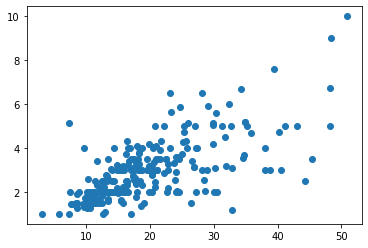

In [14]:
#how to do it in MatPlotLib
plt.scatter(tips.total_bill, tips.tip)

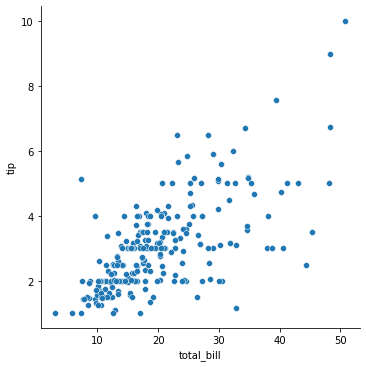

In [11]:
#this shows replationship between bill and tip using SEABORN
sns.relplot(data = tips, x = 'total_bill', y= 'tip')

In [15]:
sns.set()
sns.set_theme()
#this will set seaborn back to DEFAULTS

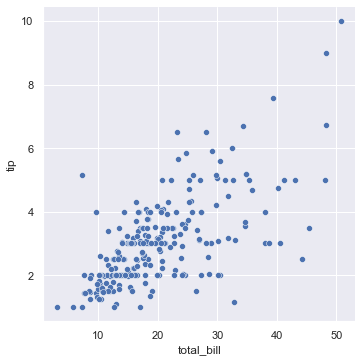

In [16]:
sns.relplot(data = tips, x = 'total_bill', y= 'tip')
#SAME chart as above but with defaults

### HUE argument
- takes categorical data
- creates its own legends
- for different subsets of data within the same plot

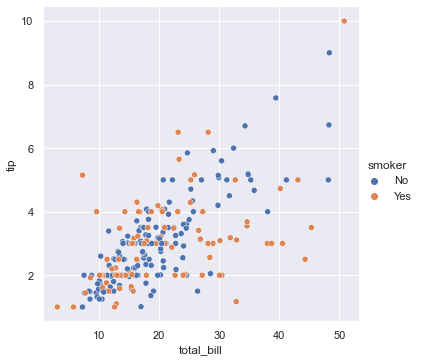

In [18]:
#shows relationship between smoker vs nonsmoker
sns.relplot(data = tips, x = 'total_bill', y= 'tip', hue = 'smoker')

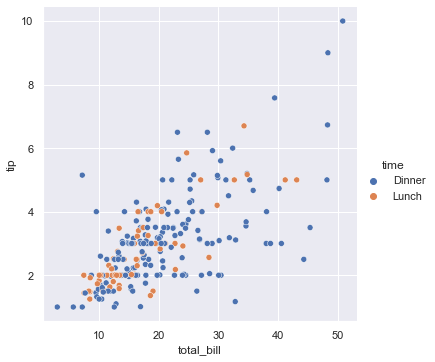

In [19]:
#shows dinner tips vs lunch tips
sns.relplot(data = tips, x = 'total_bill', y= 'tip', hue = 'time')

### STYLE argument:
- gives a different type of "marker" (x, square, dot)

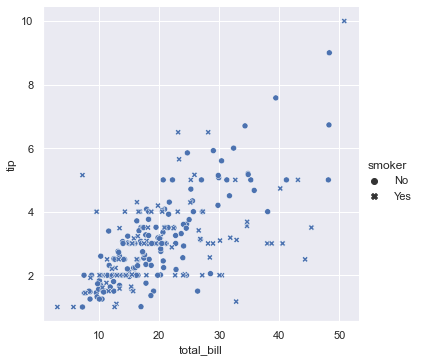

In [20]:
sns.relplot(data = tips, x = 'total_bill', y= 'tip', style = 'smoker')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

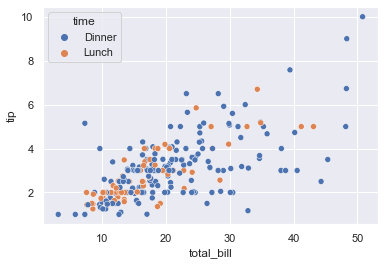

In [22]:
#scatterplot
sns.scatterplot(data = tips, x = 'total_bill', y= 'tip', hue = 'time')

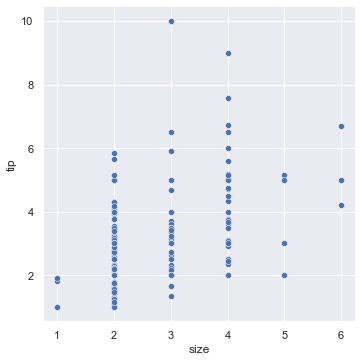

In [23]:
#relplot with discrete variable ('size')
sns.relplot(data = tips, x = 'size', y= 'tip')

### KIND argument:

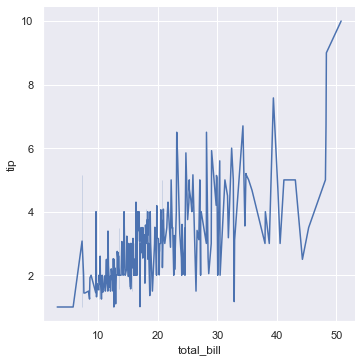

In [25]:
sns.relplot(data = tips, x = 'total_bill', y= 'tip', kind= 'line')
#this is how you switch from scatterplot (which is the default in replot) into a lineplot

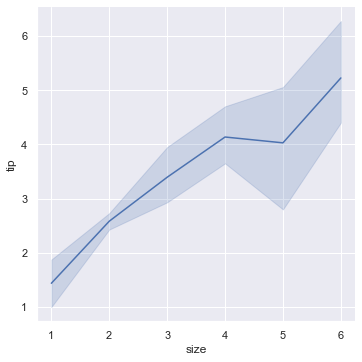

In [26]:
#lineplot
sns.relplot(data = tips, x = 'size', y= 'tip', kind= 'line')
#for each size it finds the mean, then connects with line
#shaded part is confidence interval (default is 95%)

### CONFIDENCE INTERVAL argument

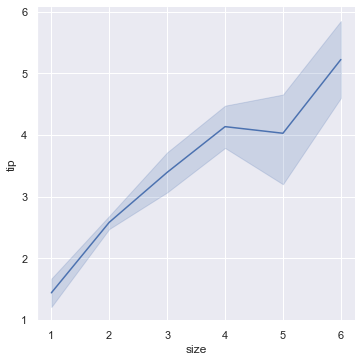

In [30]:
#can change confidence interval using "ci"
sns.relplot(data = tips, x = 'size', y= 'tip', kind= 'line', ci = 80)

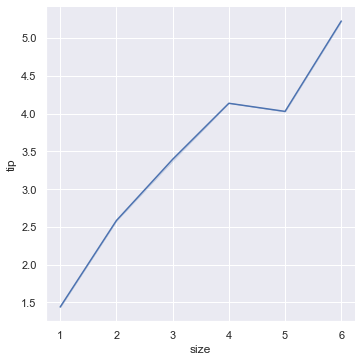

In [31]:
#turn of confidence interval
sns.relplot(data = tips, x = 'size', y= 'tip', kind= 'line', ci = 0)

### SMALL MULTIPLE
- set of charts with same scale
- looking at trends of data
- same axis
- easy to compare
- COL argument

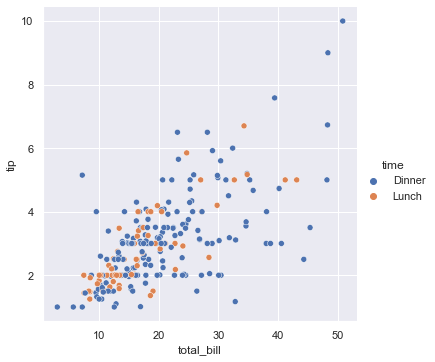

In [33]:
#original chart comparing tip and time of day
sns.relplot(data = tips, x = 'total_bill', y= 'tip', hue= 'time')

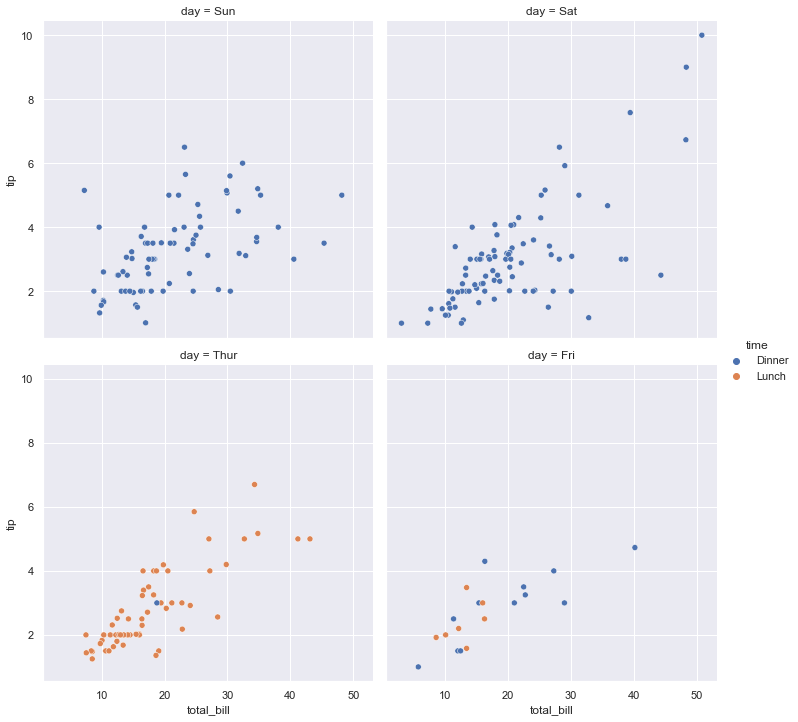

In [35]:
#small multiple 
#FacetGrid with 'col'
sns.relplot(data = tips, x = 'total_bill', y= 'tip', hue= 'time', col = 'day')

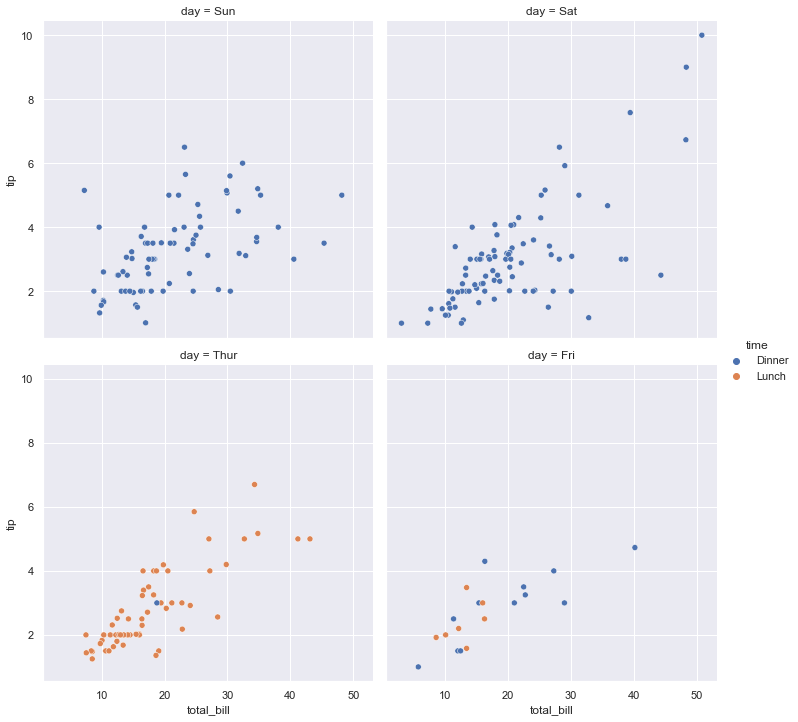

In [36]:
#small multiple but wrap by 2 graphs only- to make it more readable
sns.relplot(data = tips, x = 'total_bill', y= 'tip', hue= 'time', col = 'day', col_wrap = 2)

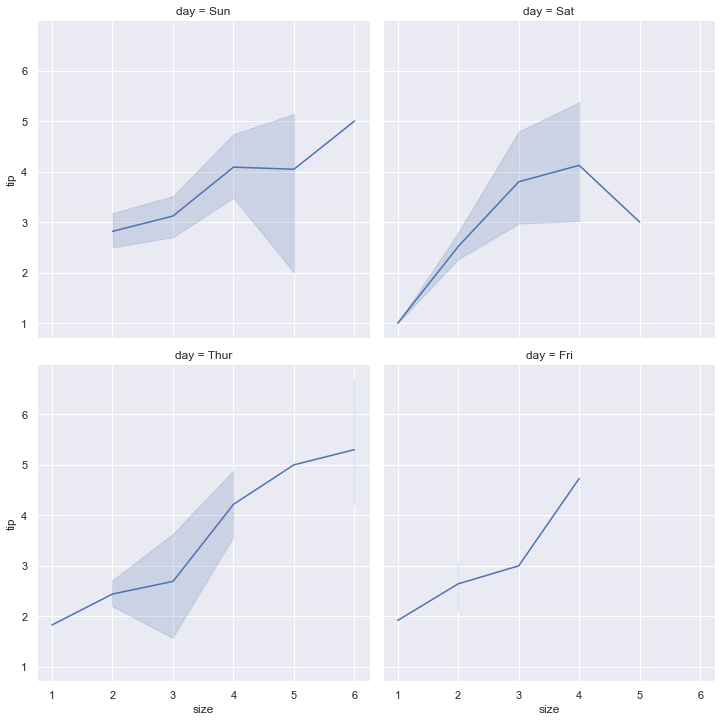

In [38]:
sns.relplot(data = tips, x = 'size', y= 'tip', kind= 'line', col = 'day', col_wrap = 2)

## DISTRIBUTION PLOT:

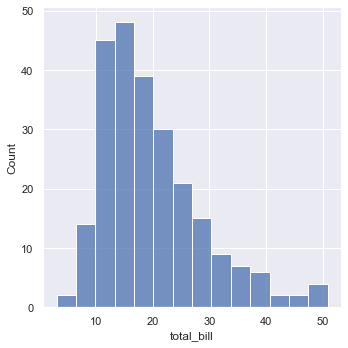

In [39]:
sns.displot(data = tips, x = 'total_bill')

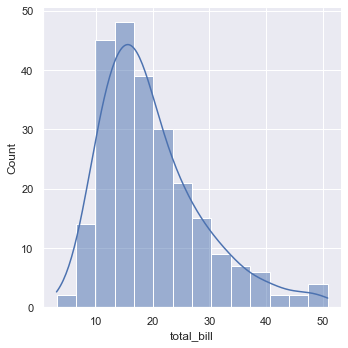

In [40]:
#add kde plot to hist
sns.displot(data = tips, x = 'total_bill', kde = True)

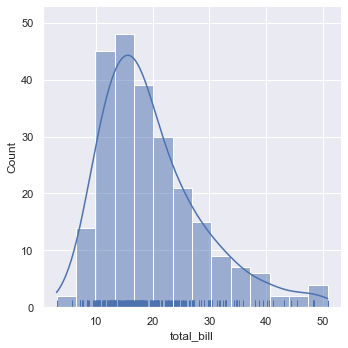

In [41]:
# only useful if you have very few observations and scale is too bug
## for example: scale 0-5000, but only a few data points in there
sns.displot(data = tips, x = 'total_bill', kde = True, rug = True)

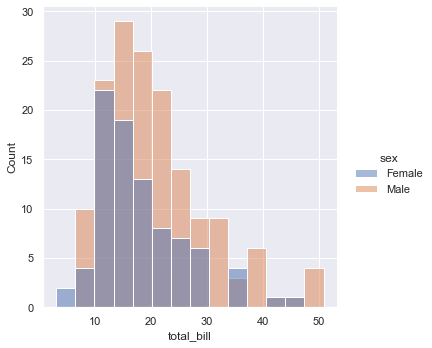

In [42]:
#Male vs Female overlapping
sns.displot(data = tips, x = 'total_bill', hue ='sex')

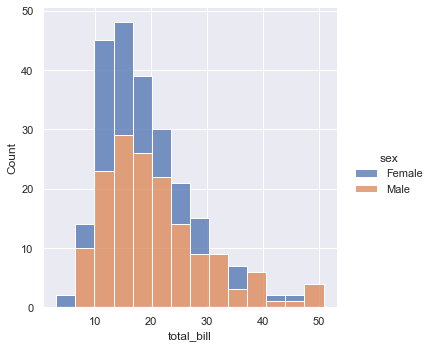

In [43]:
#stack on top of eachother so they dont overlap 
sns.displot(data = tips, x = 'total_bill', hue ='sex', multiple = 'stack')

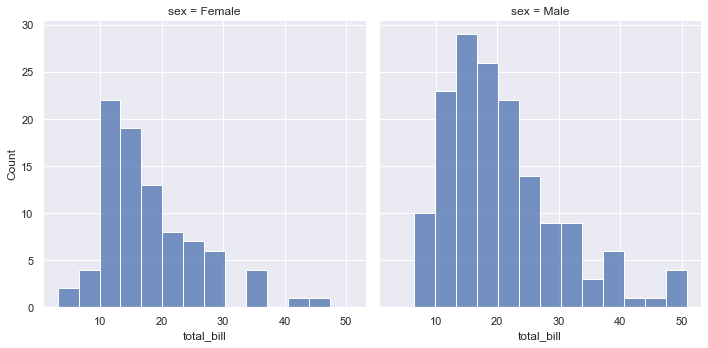

In [44]:
#this makes it even EASIER to view. "small multiples"
sns.displot(data = tips, x = 'total_bill', col ='sex')

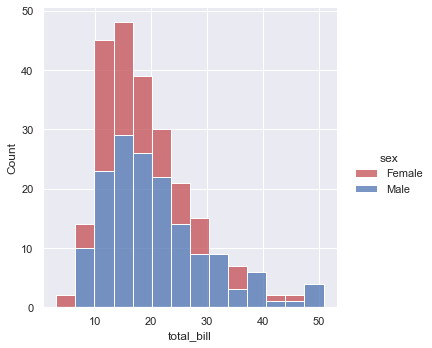

In [45]:
#change colors on stack
sns.displot(data = tips, x = 'total_bill', hue ='sex', multiple = 'stack', palette = ['r', 'b'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

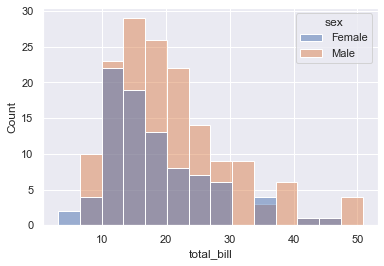

In [46]:
sns.histplot(data = tips, x = 'total_bill', hue ='sex')
#hist plot for AXES level

## CATEGORICAL PLOTS:

### BOXPLOTS

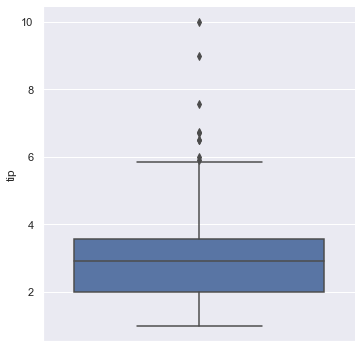

In [48]:
sns.catplot(data = tips, y = 'tip', kind = 'box')

In [50]:
tips.tip.describe()
#easily calculate IQR

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

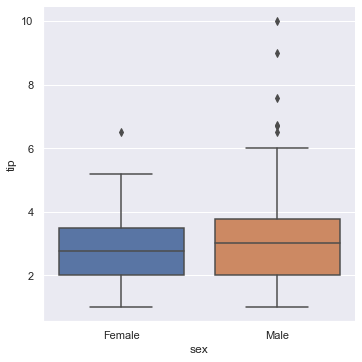

In [61]:
sns.catplot(data = tips, y = 'tip', kind = 'box', x= 'sex')

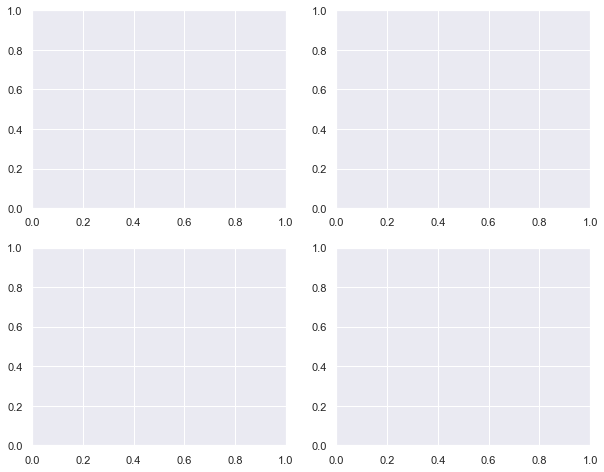

In [52]:
#create plots firest
fig, ax = plt.subplots(2,2, figsize = (10,8))

<AxesSubplot:ylabel='tip'>

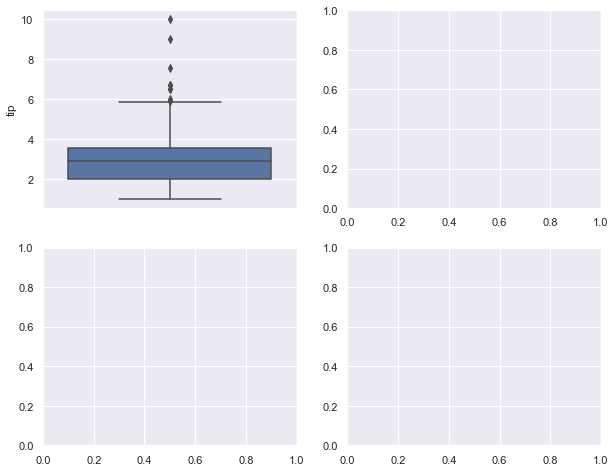

In [54]:
fig, ax = plt.subplots(2,2, figsize = (10,8))
sns.boxplot(data= tips, y ='tip', ax= ax[0,0])
#ax=ax[0,0] means first plot

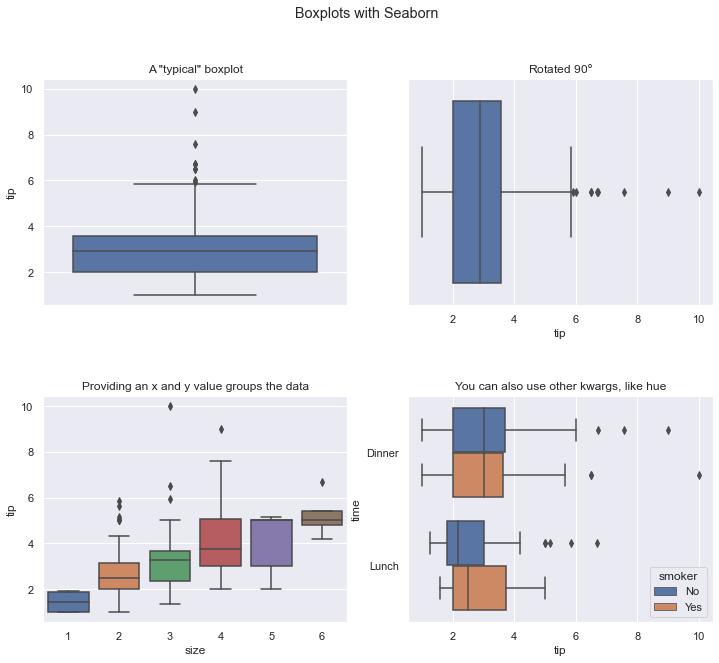

In [69]:
plt.figure(figsize=(12, 10))
plt.suptitle('Boxplots with Seaborn')

plt.subplot(221)
sns.boxplot(data=tips, y='tip')
plt.title('A "typical" boxplot')

plt.subplot(222)
sns.boxplot(data=tips, x='tip')
plt.title('Rotated 90$\degree$')

plt.subplot(223)
sns.boxplot(data=tips, y='tip', x='size')
plt.title('Providing an x and y value groups the data')

plt.subplot(224)
sns.boxplot(data=tips, y='time', x='tip', hue='smoker')
plt.title('You can also use other kwargs, like hue')

plt.subplots_adjust(hspace=0.4)

<AxesSubplot:ylabel='total_bill'>

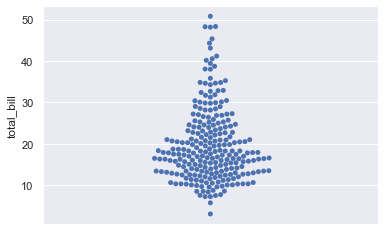

In [58]:
#swarmplot
sns.swarmplot(data = tips, y='total_bill')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

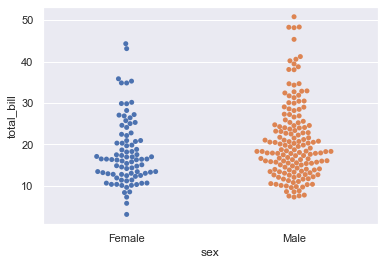

In [59]:
sns.swarmplot(data = tips, y='total_bill', x='sex')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

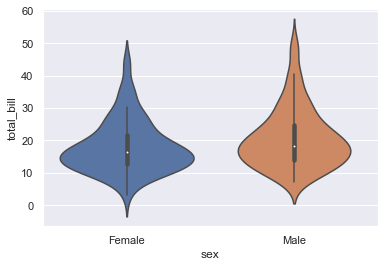

In [60]:
#similar to swarmplt
sns.violinplot(data = tips, y='total_bill', x='sex')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

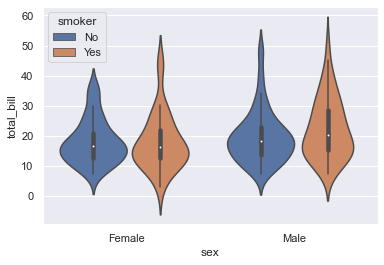

In [62]:
sns.violinplot(data = tips, y='total_bill', x='sex', hue = 'smoker')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

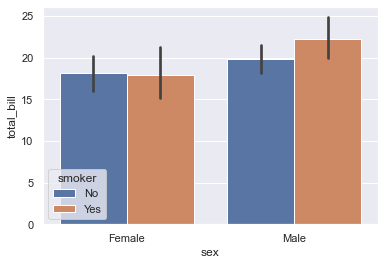

In [63]:
#barplots DO NOT show distribution
sns.barplot(data = tips, y='total_bill', x='sex', hue= 'smoker')

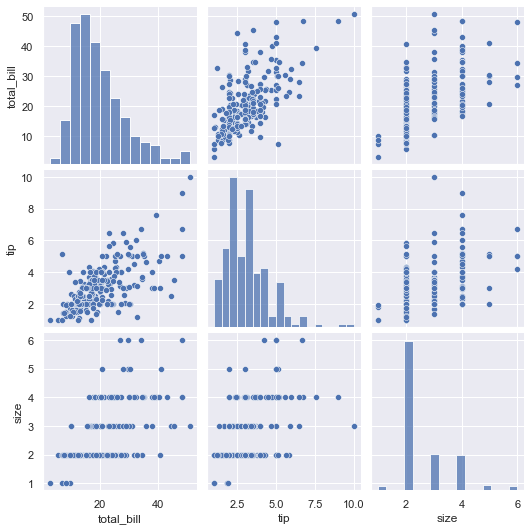

In [64]:
#this will show you all your options
#seaborn is smart enough to find same data types and plot it
sns.pairplot(tips)

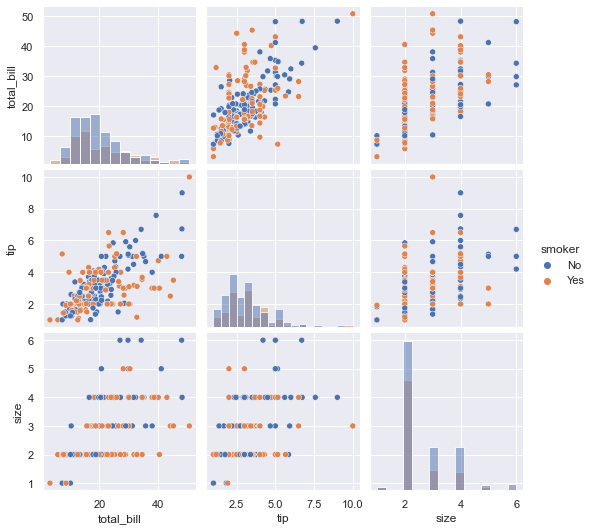

In [65]:
sns.pairplot(tips, hue='smoker', diag_kind='hist')

### JOINTPLOT:
- stand alone, dont fall into relationl or categorical
- not used very ofter

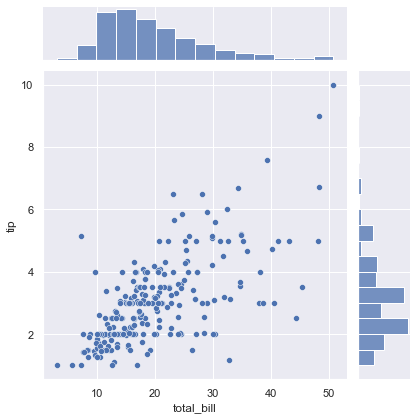

In [66]:
sns.jointplot(data= tips, x= 'total_bill', y= 'tip')

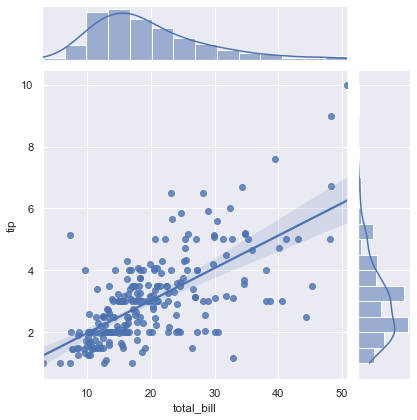

In [68]:
#draws regression line through plots
sns.jointplot(data= tips, x= 'total_bill', y= 'tip', kind = 'reg')

### Heatmap

In [71]:
#crosstab
ctab= pd.crosstab(tips.time, tips.smoker)
ctab

smoker,No,Yes
time,,
Dinner,106,70
Lunch,45,23


<AxesSubplot:xlabel='smoker', ylabel='time'>

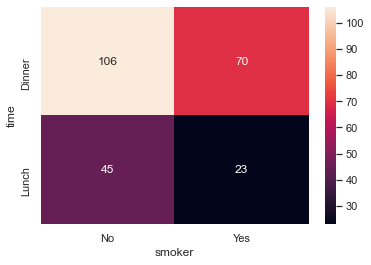

In [73]:
sns.heatmap(ctab, annot =True, fmt= '.0f')
# annot = annotate/label
# fmt= format

In [74]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### CORRELATION: .corr()
#### correlation - value 1 = positive value
#### correlation - value -1 = negative value
#### correlation value-0 = no relation

In [75]:
mpg.corr()

,displ,year,cyl,cty,hwy
displ,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,-0.766020,0.002158,-0.761912,0.955916,1.000000


<AxesSubplot:>

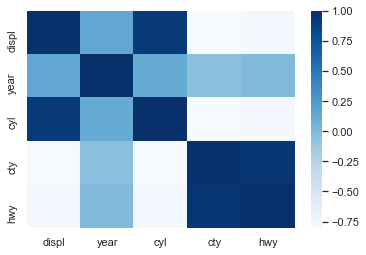

In [76]:
sns.heatmap(mpg.corr(), cmap= 'Blues')

<AxesSubplot:>

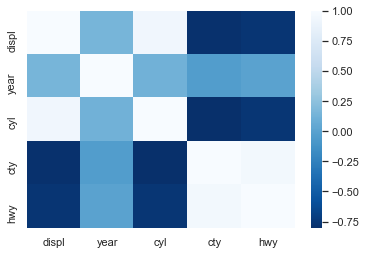

In [78]:
sns.heatmap(mpg.corr(), cmap= 'Blues_r')
#reverses colors

<AxesSubplot:>

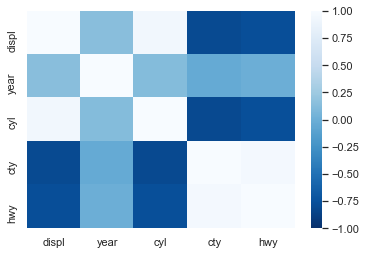

In [79]:
sns.heatmap(mpg.corr(), cmap= 'Blues_r', vmax=1 , vmin=-1)
#changes range of legend

In [77]:
labels = ['Displacement', 'Model Year', 'cylinders', 'City MPG', 'Highway MPG']

In [ ]:
sns.heatmap(mpg.corr(), cmap= 'Blues_r', vmax=1 , vmin=-1, linewidth=1, lincolor = 'k', annot = True, fmt )